In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.svm import SVC
import matplotlib.pyplot as plt

C:\Users\Екатерина\AppData\Local\Temp\ipykernel_11160\3402586914.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## Решение задачи бинарной классификации

### Логистическая регрессия

y = {-1, 1}

$b(x) = \sigma(<w,x>)$, где $\sigma(z) = \frac{1}{1 + e^{-z}}$

Поработаем с уже известным нам датасетом Titanic. 

In [91]:
data = pd.read_csv(r'D:\\datasets\\titanic.csv')
data.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Почистим его и оставим только интересующие нас колонки. 

In [92]:
data.drop(['Name', 'Cabin', 'Ticket', 'PassengerId'], axis=1, inplace=True)

In [93]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [82]:
set(data.Embarked)

{'C', 'Q', 'S', nan}

In [94]:
data['Age'] = data['Age'].fillna((data['Age'].mean()))


In [95]:
data['Embarked'] = data['Embarked'].fillna('C')

In [96]:
data.Sex = data.Sex.apply(lambda x: 1 if x == 'male' else 0)

In [97]:
data = pd.get_dummies(data, columns=['Embarked'], drop_first=True)

In [98]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,7.2500,False,True
1,1,1,0,38.0,1,0,71.2833,False,False
2,1,3,0,26.0,0,0,7.9250,False,True
3,1,1,0,35.0,1,0,53.1000,False,True
4,0,3,1,35.0,0,0,8.0500,False,True


<Axes: >

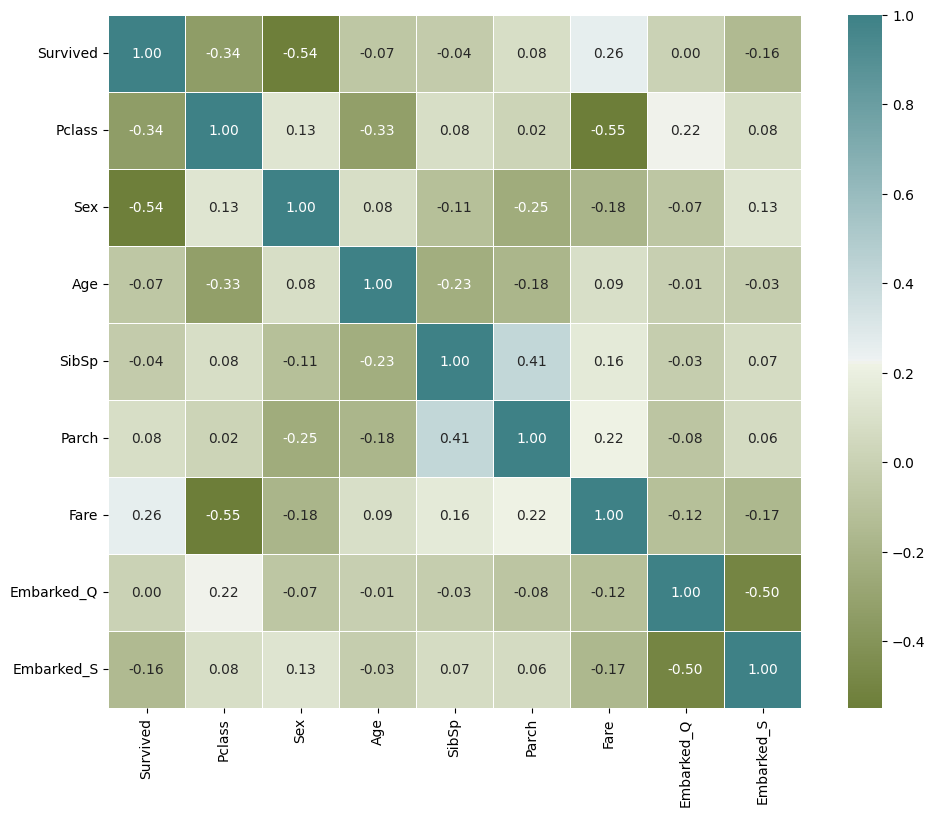

In [99]:
plt.figure(figsize=(12,9))

corr = data.corr()

sns.heatmap(corr,annot=True,linewidths=.5,fmt= '.2f',\
            mask=np.zeros_like(corr, dtype=bool), \
            cmap=sns.diverging_palette(100,200,as_cmap=True), square=True)


In [100]:
data.drop(['Embarked_Q', 'Embarked_S'], axis=1, inplace=True)

In [101]:
X = data.drop('Survived', axis=1)
y = data.Survived
X_train, X_test, y_train, y_test = train_test_split(X, y)

Посмотрим, сбалансированная ли у нас выборка:

In [102]:
y.value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

Баланс не очень. Попробуем посмотреть сразу все скоры. 

In [103]:
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)
ypred_train = model.predict(X_train)
ypred_test = model.predict(X_test)
print(classification_report(ypred_train, y_train), classification_report(ypred_test, y_test))

              precision    recall  f1-score   support

           0       0.88      0.82      0.85       436
           1       0.70      0.78      0.74       232

    accuracy                           0.81       668
   macro avg       0.79      0.80      0.79       668
weighted avg       0.82      0.81      0.81       668
               precision    recall  f1-score   support

           0       0.80      0.80      0.80       139
           1       0.67      0.67      0.67        84

    accuracy                           0.75       223
   macro avg       0.73      0.73      0.73       223
weighted avg       0.75      0.75      0.75       223



In [104]:
model = SVC(kernel='linear')
model.fit(X_train, y_train)
ypred_train = model.predict(X_train)
ypred_test = model.predict(X_test)
print(classification_report(ypred_train, y_train), classification_report(ypred_test, y_test))

              precision    recall  f1-score   support

           0       0.87      0.82      0.84       436
           1       0.69      0.77      0.73       232

    accuracy                           0.80       668
   macro avg       0.78      0.79      0.78       668
weighted avg       0.81      0.80      0.80       668
               precision    recall  f1-score   support

           0       0.83      0.81      0.82       142
           1       0.68      0.70      0.69        81

    accuracy                           0.77       223
   macro avg       0.75      0.76      0.75       223
weighted avg       0.77      0.77      0.77       223



Как видим, мало отличается от работы с регрессией, синтаксис все тот же. Как sklearn понимает вообще, что у нас данные для регрессии или для классификации? А никак, мы можем спокойно применять регрессию к данным, предназначенным для классификации, и наоборот, решаем только мы сами, какой алгоритм куда больше подходит. 

## Pipeline

Поработаем с датасетом про кредиты: нам нужно решить, давать кредит человеку или нет. Попробуем отмасштабировать данные и заодно собрать все в пайплайн, чтобы было удобнее. 

In [184]:
data = pd.read_csv(r'D:\\datasets\\loan_sanction_train.csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Поработаем с признаками и дропнем пропуски. 

In [185]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [192]:
missing_values = data.isnull().sum().sort_values(ascending = False)
missing_values = missing_values[missing_values > 0] / data.shape[0]
print(f'{missing_values * 100} %')

Series([], dtype: float64) %


In [187]:
data.drop(['Loan_ID'], axis=1, inplace=True)

In [188]:
data['Gender'] = data['Gender'].fillna('Male')
data['Married'] = data['Married'].fillna('No')
data['Credit_History'] = data['Credit_History'].fillna(0)
data['Self_Employed'] = data['Self_Employed'].fillna('No')
data['LoanAmount'] = data['LoanAmount'].fillna((data['LoanAmount'].mean()))
data['Dependents'] = data['Dependents'].fillna(0)
data['Loan_Amount_Term'] = data['Loan_Amount_Term'].fillna((data['Loan_Amount_Term'].mean()))


In [189]:
data.Gender = data.Gender.apply(lambda x: 1 if x == 'Male' else 0)
data.Married = data.Married.apply(lambda x: 1 if x == 'Yes' else 0)
data.Education = data.Education.apply(lambda x: 1 if x == 'Graduate' else 0)
data.Self_Employed = data.Self_Employed.apply(lambda x: 1 if x == 'Yes' else 0)
data.Loan_Status = data.Loan_Status.apply(lambda x: 1 if x == 'Y' else 0)


In [190]:
def map_deps(deps):
    if deps == '3+':
        return 3
    else:
        return int(deps)
    
data['Dependents'] = data['Dependents'].apply(map_deps)

In [191]:
data = pd.get_dummies(data, columns=['Property_Area'], drop_first=True)

In [182]:
set(data.ApplicantIncome)

{150,
 210,
 416,
 645,
 674,
 1000,
 1025,
 1299,
 1378,
 1442,
 1500,
 1538,
 1600,
 1625,
 1668,
 1759,
 1782,
 1800,
 1809,
 1811,
 1820,
 1828,
 1830,
 1836,
 1853,
 1863,
 1875,
 1880,
 1907,
 1916,
 1926,
 1928,
 1958,
 1963,
 1977,
 1993,
 2000,
 2014,
 2031,
 2045,
 2058,
 2060,
 2071,
 2083,
 2130,
 2132,
 2137,
 2138,
 2149,
 2165,
 2167,
 2178,
 2192,
 2213,
 2214,
 2221,
 2237,
 2239,
 2253,
 2275,
 2281,
 2297,
 2301,
 2309,
 2330,
 2333,
 2346,
 2366,
 2378,
 2383,
 2395,
 2400,
 2423,
 2425,
 2435,
 2439,
 2454,
 2473,
 2479,
 2483,
 2484,
 2491,
 2492,
 2499,
 2500,
 2507,
 2510,
 2526,
 2550,
 2577,
 2583,
 2600,
 2609,
 2620,
 2625,
 2645,
 2647,
 2653,
 2661,
 2666,
 2667,
 2679,
 2698,
 2699,
 2708,
 2717,
 2718,
 2720,
 2726,
 2750,
 2755,
 2764,
 2768,
 2769,
 2785,
 2787,
 2799,
 2833,
 2873,
 2875,
 2876,
 2882,
 2889,
 2894,
 2895,
 2900,
 2917,
 2920,
 2927,
 2929,
 2935,
 2947,
 2957,
 2958,
 2965,
 2971,
 2980,
 2987,
 2995,
 3000,
 3010,
 3013,
 3015,
 301

<Axes: >

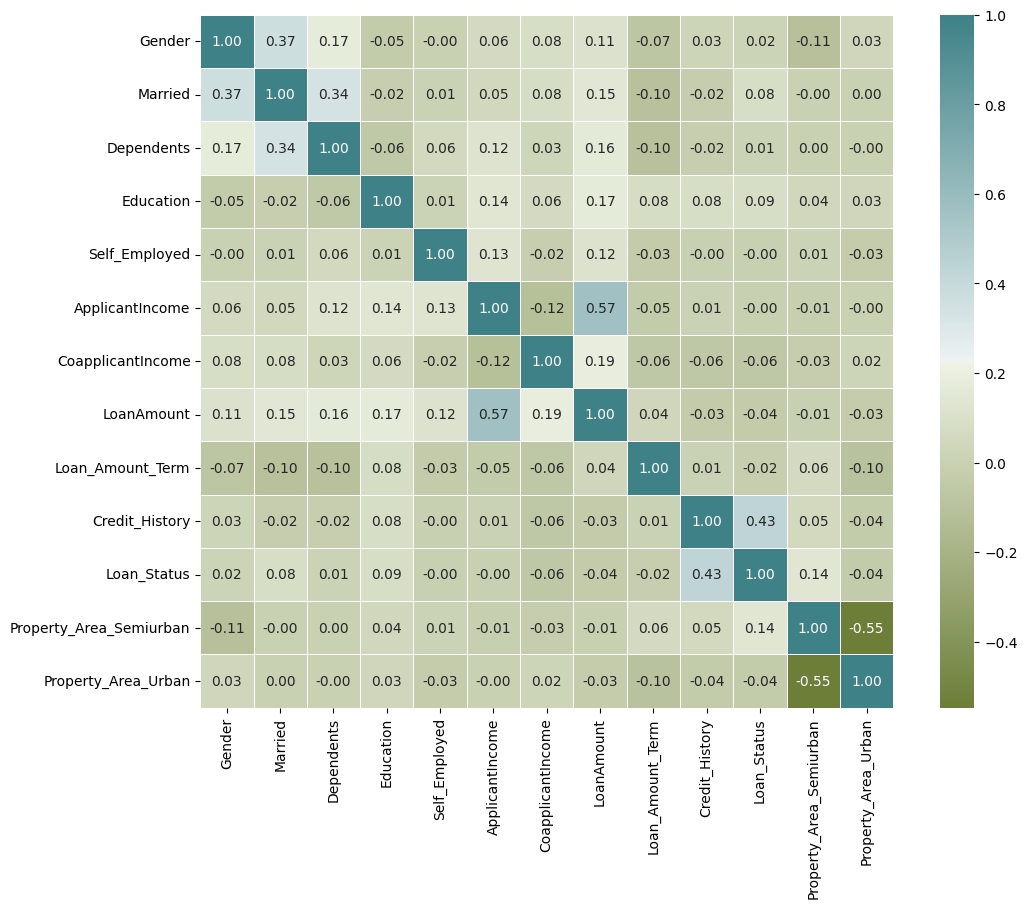

In [193]:
plt.figure(figsize=(12,9))

corr = data.corr()

sns.heatmap(corr,annot=True,linewidths=.5,fmt= '.2f',\
            mask=np.zeros_like(corr, dtype=bool), \
            cmap=sns.diverging_palette(100,200,as_cmap=True), square=True)


In [194]:
data.drop(['Self_Employed', 'ApplicantIncome', 'Dependents'], axis=1, inplace=True)

Разделим на трейн и тест. 

In [195]:
X = data.drop('Loan_Status', axis=1)
y = data.Loan_Status
X_train, X_test, y_train, y_test = train_test_split(X, y)

Соберем пайплайн: комбайн, который будет внутри себя сразу гонять и масштабирование, и модель

In [196]:
pipe = Pipeline([('scaler', StandardScaler()), ('model', LogisticRegression())])

Альтернативный вариант:

pipe = make_pipeline(StandardScaler(), LogisticRegression())

В чем между ними разница? Во-первых, второе - упрощенный синтаксис, вы не прописываете вручную ярлычки для своих шагов пайплайна. Во-вторых, получается, эти ярлычки приписываются автоматически (по правилу: название класса строчными буквами, например, у StandardScaler автоматически будет ярлычок standardscaler). Это сакральное знание пригодится, когда будем гридсерчить параметры. 

In [197]:
pipe.fit(X_train, y_train)
ypred_train = pipe.predict(X_train)
ypred_test = pipe.predict(X_test)
print(classification_report(ypred_train, y_train), classification_report(ypred_test, y_test))

              precision    recall  f1-score   support

           0       0.46      0.69      0.55        90
           1       0.91      0.80      0.85       370

    accuracy                           0.78       460
   macro avg       0.68      0.74      0.70       460
weighted avg       0.82      0.78      0.79       460
               precision    recall  f1-score   support

           0       0.48      0.68      0.56        40
           1       0.87      0.75      0.80       114

    accuracy                           0.73       154
   macro avg       0.67      0.71      0.68       154
weighted avg       0.77      0.73      0.74       154



In [198]:
y.value_counts()

Loan_Status
1    422
0    192
Name: count, dtype: int64

In [205]:
X = data.drop('Loan_Status', axis=1)
y = data.Loan_Status
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

In [206]:
y.value_counts()

Loan_Status
1    422
0    192
Name: count, dtype: int64

In [207]:
pipe = Pipeline([('scaler', StandardScaler()), ('model', LogisticRegression())])
pipe.fit(X_train, y_train)
ypred_train = pipe.predict(X_train)
ypred_test = pipe.predict(X_test)
print(classification_report(ypred_train, y_train), classification_report(ypred_test, y_test))

              precision    recall  f1-score   support

           0       0.51      0.70      0.59       106
           1       0.90      0.80      0.85       354

    accuracy                           0.78       460
   macro avg       0.71      0.75      0.72       460
weighted avg       0.81      0.78      0.79       460
               precision    recall  f1-score   support

           0       0.46      0.65      0.54        34
           1       0.89      0.78      0.83       120

    accuracy                           0.75       154
   macro avg       0.67      0.72      0.68       154
weighted avg       0.79      0.75      0.77       154



### Несбалансированные классы

Давайте порешаем еще одну финансовую задачку: будем предсказывать, возьмет клиент банка кредит или нет. 

In [208]:
data = pd.read_csv(r'D:\\datasets\\bank-additional-full.csv', sep=';')
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


Для начала просто дропнем все нечисловые характеристики. 

In [213]:
X = data.select_dtypes(include=np.number)
y = data.y

Проверим распределение классов:

In [214]:
y.value_counts()

y
no     36548
yes     4640
Name: count, dtype: int64

Обучите обычную логистическую регрессию на этом датасете и выведите classification report.

In [211]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y) # параметр stratify делает подвыборки с равномерным (по возможности) распределением классов

In [215]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [212]:
#со stratify
pipe = Pipeline([('scaler', StandardScaler()), ('model', LogisticRegression())])
pipe.fit(X_train, y_train)
ypred_train = pipe.predict(X_train)
ypred_test = pipe.predict(X_test)
print(classification_report(ypred_train, y_train), classification_report(ypred_test, y_test))

              precision    recall  f1-score   support

          no       0.97      0.93      0.95     28862
         yes       0.39      0.66      0.49      2029

    accuracy                           0.91     30891
   macro avg       0.68      0.79      0.72     30891
weighted avg       0.94      0.91      0.92     30891
               precision    recall  f1-score   support

          no       0.98      0.93      0.95      9632
         yes       0.39      0.69      0.50       665

    accuracy                           0.91     10297
   macro avg       0.69      0.81      0.73     10297
weighted avg       0.94      0.91      0.92     10297



In [216]:
#без stratify
pipe = Pipeline([('scaler', StandardScaler()), ('model', LogisticRegression())])
pipe.fit(X_train, y_train)
ypred_train = pipe.predict(X_train)
ypred_test = pipe.predict(X_test)
print(classification_report(ypred_train, y_train), classification_report(ypred_test, y_test))
#я попыталась добавить stratify во второй задаче тоже, и либо я что-то делаю не так, либо на результат он влияет очень слабо

              precision    recall  f1-score   support

          no       0.97      0.93      0.95     28798
         yes       0.40      0.67      0.50      2093

    accuracy                           0.91     30891
   macro avg       0.69      0.80      0.72     30891
weighted avg       0.94      0.91      0.92     30891
               precision    recall  f1-score   support

          no       0.97      0.93      0.95      9595
         yes       0.41      0.64      0.50       702

    accuracy                           0.91     10297
   macro avg       0.69      0.79      0.73     10297
weighted avg       0.93      0.91      0.92     10297



Какие выводы можете сделать на основании метрик?

А теперь давайте применим особую магию с class_weight. 

In [217]:
from sklearn.utils.class_weight import compute_class_weight
classes = np.unique(y)
weights = compute_class_weight('balanced', classes=classes, y=y)
class_weights = {k: v for k, v in zip(classes, weights)}
print('Class weights:', class_weights)

Class weights: {'no': 0.5634781656999015, 'yes': 4.438362068965517}


In [218]:
model = LogisticRegression(solver='liblinear', class_weight={'no': 0.5634781656999015, 'yes': 4.438362068965517}) #я не уверена, что это то, что надо было сделать, но я сделала
model.fit(X_train, y_train)
ypred_train = model.predict(X_train)
ypred_test = model.predict(X_test)
print(classification_report(ypred_train, y_train), classification_report(ypred_test, y_test))

              precision    recall  f1-score   support

          no       0.85      0.98      0.91     23696
         yes       0.85      0.42      0.56      7195

    accuracy                           0.85     30891
   macro avg       0.85      0.70      0.73     30891
weighted avg       0.85      0.85      0.83     30891
               precision    recall  f1-score   support

          no       0.85      0.98      0.91      7928
         yes       0.87      0.40      0.55      2369

    accuracy                           0.85     10297
   macro avg       0.86      0.69      0.73     10297
weighted avg       0.85      0.85      0.83     10297

